In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\\tesseract.exe'

In [2]:
pip install opencv-python

In [3]:
import cv2

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img=cv2.imread("1image.png")
cv2.namedWindow('sample image', cv2.WINDOW_NORMAL)
cv2.imshow('sample image', img)
text=pytesseract.image_to_string(img)
print(text)

In [4]:
import pandas as pd
train = pd.read_csv('trainify.csv')
print("Training Set:"% train.columns, train.shape, len(train))

Training Set: (236, 3) 236


In [5]:
test = pd.read_csv('testuu.csv')
print("Test Set:"% test.columns, test.shape, len(test))

Test Set: (135, 2) 135


In [6]:
test

,ID,Tweet
0,1,anal
1,2,anus
2,3,arse
3,4,ass
4,5,ballsack
...,...,...
130,131,xnxx
131,132,xhamster
132,133,Dildo
133,134,Cigarettes


#### Data Cleaning

In [7]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(test, "Tweet")
train_clean = clean_text(train, "Tweet")

In [8]:
test_clean

,ID,Tweet
0,1,anal
1,2,anus
2,3,arse
3,4,ass
4,5,ballsack
...,...,...
130,131,xnxx
131,132,xhamster
132,133,dildo
133,134,cigarettes


In [9]:
train_clean

,ID,Label,Tweet
0,1,1.0,anal
1,2,1.0,anus
2,3,1.0,arse
3,4,1.0,ass
4,5,1.0,ballsack
...,...,...,...
231,232,NaN,imposing
232,233,NaN,illustrious
233,234,NaN,ravishing
234,235,NaN,unfathomable


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Handling Imbalanced data

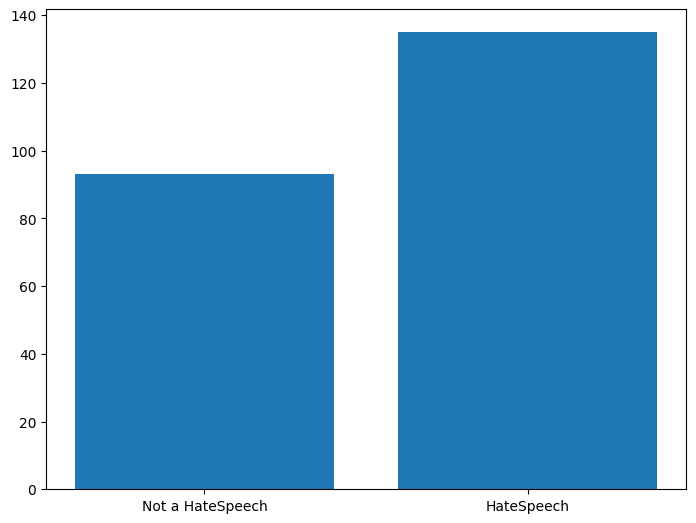

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_clean[train_clean.Label==0]),len(train_clean[train_clean.Label==1])]
ax.bar(langs,data)
plt.show()

In [12]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.Label==0]
train_minority = train_clean[train_clean.Label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['Label'].value_counts()

1.0    93
0.0    93
Name: Label, dtype: int64

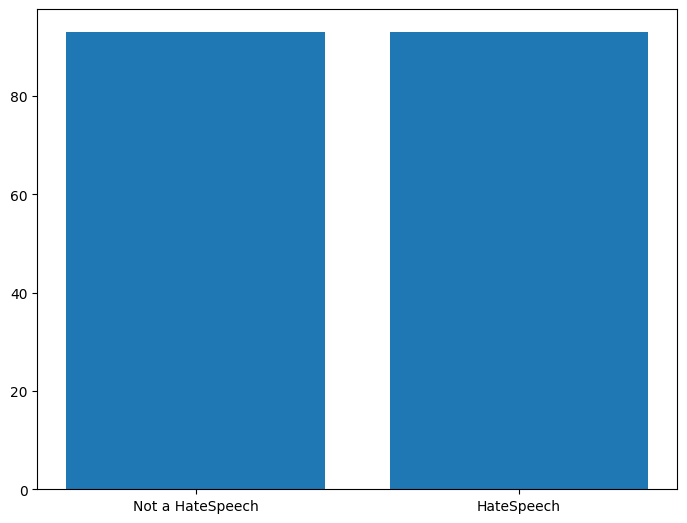

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_upsampled[train_upsampled.Label==0]),len(train_upsampled[train_upsampled.Label==1])]
ax.bar(langs,data)
plt.show()

#### Pipeline

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['Tweet'],
                                                    train_upsampled['Label'],random_state = 0)

In [16]:
model = pipeline_sgd.fit(X_train, y_train)



In [17]:
def textualads():
	user_input = input("enter the sentance")
	predicted_sentiment = model.predict([user_input])
	print("Predicted sentiment:", predicted_sentiment[0])

In [18]:
def imageads():
	path=input("enter image path")
	img=cv2.imread("path")
	cv2.namedWindow('sample image', cv2.WINDOW_NORMAL)
	cv2.imshow('sample image', img)
	text=pytesseract.image_to_string(img)
	print(text)





In [ ]:
option = int(input("enter 1 for text and 2 for image"))
if option==1:
	textualads()
if option==2:
	imageads()